In [1]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [2]:
# Import data Final_merged_city.csv
df = pd.read_csv("Final_merged_city.csv")

In [3]:
df.head(20)

Unnamed: 0      geo_id                                      centroid  \
0         4384  6073015502  POINT (-116.8304254797509 32.81131603277056)   
1         4387  6073015502  POINT (-116.8304254797509 32.81131603277056)   
2         4390  6073015502  POINT (-116.8304254797509 32.81131603277056)   
3         4393  6073015502  POINT (-116.8304254797509 32.81131603277056)   
4         4396  6073015502  POINT (-116.8304645225708 32.81130364624261)   
5         4399  6073015502   POINT (-116.830446134218 32.81131662191954)   
6         4402  6073015502  POINT (-116.8299969494062 32.81020076184434)   
7         4405  6073015502  POINT (-116.8300017429104 32.81048542676395)   
8         7664  6073021202    POINT (-116.641978140868 32.8284525792826)   
9         7667  6073021202    POINT (-116.641978140868 32.8284525792826)   
10        7670  6073021202    POINT (-116.641978140868 32.8284525792826)   
11        7673  6073021202    POINT (-116.641978140868 32.8284525792826)   
12        7676  6073021202  POINT (-116.6419700474266 32.82845364823388)   
13        7679  6073021202  POINT (-116.6419722257603 32.82845198050143)   
14        7682  6073021202  POINT (-116.6419808533083 32.82844975923475)   
15        7685  6073021202  POINT (-116.6419904629164 32.82846347730869)   
16        7688  6073021204  POINT (-116.7638240859188 32.81083847358348)   
17        7690  6073021204  POINT (-116.7638240859188 32.81083847358348)   
18        7692  6073021204  POINT (-116.7638240859188 32.81083847358348)   
19        7694  6073021204  POINT (-116.7638240859188 32.81083847358348)   

    year                                           geometry  total_tran  \
0   2010  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1194.0   
1   2011  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1229.0   
2   2012  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1297.0   
3   2013  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1226.0   
4   2014  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1239.0   
5   2015  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1365.0   
6   2016  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1331.0   
7   2017  MULTIPOLYGON (((-116.8583888559341 32.81723278...      1322.0   
8   2010  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1172.0   
9   2011  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1265.0   
10  2012  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1310.0   
11  2013  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1364.0   
12  2014  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1341.0   
13  2015  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1486.0   
14  2016  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1345.0   
15  2017  MULTIPOLYGON (((-116.7511618358752 32.79765279...      1537.0   
16  2010  MULTIPOLYGON (((-116.828524849101 32.794331787...      2347.0   
17  2011  MULTIPOLYGON (((-116.828524849101 32.794331787...      2260.0   
18  2012  MULTIPOLYGON (((-116.828524849101 32.794331787...      2245.0   
19  2013  MULTIPOLYGON (((-116.828524849101 32.794331787...      2480.0   

       pop    edut  collegemale  collegefemale  ...  ratio_65  ratio_22_50  \
0   2433.0  1651.0        130.0          107.0  ...  0.345664     0.058775   
1   2496.0  1717.0        124.0          114.0  ...  0.332131     0.079327   
2   2529.0  1790.0        124.0          107.0  ...  0.345987     0.086200   
3   2698.0  1900.0        141.0          148.0  ...  0.320979     0.143810   
4   2699.0  1865.0        143.0          135.0  ...  0.309003     0.115969   
5   2909.0  2005.0        126.0          152.0  ...  0.314197     0.114816   
6   2849.0  2017.0        108.0          151.0  ...  0.316602     0.151281   
7   2902.0  2072.0        135.0          162.0  ...  0.310820     0.155065   
8   2828.0  1930.0         86.0           43.0  ...  0.368105     0.050919   
9   3164.0  1991.0         87.0           94.0  ...

In [6]:
df["geo_id"].nunique()

627

In [7]:
# Check all column names
df.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'gini', 'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'diffEmpratio', 'diffestabratio', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio'],
      dtype='object')

# modeling

dependent variables(outputs):
1. Empratio : the size of employment  of all industries in corresponding us census tract and  year

2. estabratio: the size of establishment of all industries in corresponding us census tract and  year


use all the varaibles to predict establishment size 
1. pop: the total population of the corresponding census tract(not prediction)
2. households: households of the corresponding census tract
3. income: income of the corresponding census tract
4. edut: total education population of the corresponding census tract
5. total_college: college population of the corresponding census tract
6. college_ratio: total college ratio
7. ratio_65: the ratio of the population who are older than 65
8. ration_22_50: the ratio of the population who are from 22 to 50
9. diffEmpratio: the difference of employee size from last year at same census tract
10. diffestabratio: the difference of establishment size from last year at the same census tract
11. college_ratio_pop: the ratio of college attendance by the total population
12. bus_ratio: the ratio of bus usage by total public transportation
13. bus_ratio_total: the ratio of bus usage by total transportation(including private and public transportation)
14. public_ratio: the ratio of public transportation by total transportation
15. car_ratio: the ratio of car usage by total transportation
16. bicy_ratio: the ratio of bicycle usage by total transportation
17. walked_ratio: ration of people who walked to work by total transportation usage
18. gini: Gini index of the corresponding census tract

In [8]:
# Calculate the total population with college degrees
df["total_college"] = df["collegemale"] + df["collegefemale"]

# Calculate the ratio of people with college degree vs education population
df["college_ratio"] = df["total_college"] / df["edut"]

# Calculate the ratio of people with college degree vs total population
df["college_ratio_pop"] = df["total_college"] / df["pop"]

In [9]:
data = df[["zipcode", "geo_id", "year", "pop", "households", "income", "edut", "total_college", "college_ratio",
          "ratio_65", "ratio_22_50", "diffEmpratio", "diffestabratio", "college_ratio_pop", "bus_ratio", 
           "bus_ratio_total", "public_ratio", "car_ratio", "bicy_ratio", "walked_ratio", "gini", 
           "Empratio", "estabratio"]]

In [10]:
data.head(20)

zipcode      geo_id  year     pop  households  income    edut  \
0     91901  6073015502  2010  2433.0        83.0   864.0  1651.0   
1     91901  6073015502  2011  2496.0        95.0   896.0  1717.0   
2     91901  6073015502  2012  2529.0       113.0   904.0  1790.0   
3     91901  6073015502  2013  2698.0       136.0   903.0  1900.0   
4     91901  6073015502  2014  2699.0       154.0   883.0  1865.0   
5     91901  6073015502  2015  2909.0       170.0   949.0  2005.0   
6     91901  6073015502  2016  2849.0       189.0   950.0  2017.0   
7     91901  6073015502  2017  2902.0       186.0   957.0  2072.0   
8     91901  6073021202  2010  2828.0        93.0  1098.0  1930.0   
9     91901  6073021202  2011  3164.0       113.0  1077.0  1991.0   
10    91901  6073021202  2012  3252.0       121.0  1076.0  2101.0   
11    91901  6073021202  2013  3257.0       140.0  1084.0  2113.0   
12    91901  6073021202  2014  3095.0       159.0  1110.0  2059.0   
13    91901  6073021202  2015  3463.0       177.0  1164.0  2222.0   
14    91901  6073021202  2016  3234.0       175.0  1089.0  2086.0   
15    91901  6073021202  2017  3570.0       174.0  1152.0  2133.0   
16    91901  6073021204  2010  4668.0       148.0  1666.0  3293.0   
17    91901  6073021204  2011  4631.0       144.0  1697.0  3460.0   
18    91901  6073021204  2012  4857.0       156.0  1760.0  3683.0   
19    91901  6073021204  2013  5096.0       162.0  1797.0  3679.0   

    total_college  college_ratio  ratio_65  ...  college_ratio_pop  bus_ratio  \
0           237.0       0.143549  0.345664  ...           0.097411   0.000000   
1           238.0       0.138614  0.332131  ...           0.095353   0.000000   
2           231.0       0.129050  0.345987  ...           0.091340   0.000000   
3           289.0       0.152105  0.320979  ...           0.107116   0.000000   
4           278.0       0.149062  0.309003  ...           0.103001   0.000000   
5           278.0       0.138653  0.314197  ...           0.095565   0.000000   
6           259.0       0.128409  0.316602  ...           0.090909   0.000000   
7           297.0       0.143340  0.310820  ...           0.102343   0.000000   
8           129.0       0.066839  0.368105  ...           0.045615   0.000000   
9           181.0       0.090909  0.343552  ...           0.057206   0.000000   
10          225.0       0.107092  0.345941  ...           0.069188   0.000000   
11          271.0       0.128254  0.338655  ...           0.083205   0.000000   
12          268.0       0.130160  0.306300  ...           0.086591   0.000000   
13          323.0       0.145365  0.285302  ...           0.093272   0.000000   
14          295.0       0.141419  0.265925  ...           0.091218   0.000000   
15          338.0       0.158462  0.278431  ...           0.094678   0.000000   
16          640.0       0.194352  0.301414  ...           0.137104   1.000000   
17          702.0       0.202890  0.259555  ...           0.151587   1.000000   
18          777.0       0.210969  0.249331  ...           0.159975   1.000000   
19          663.0       0.180212  0.256868  ...           0.130102   0.392857   

    bus_ratio_total  public_ratio  car_ratio  bicy_ratio  walked_ratio  \
0          0.000000      0.000000   0.917085         0.0      0.044389   
1          0.000000      0.000000   0.926770         0.0      0.038242   
2          0.000000      0.000000   0.925212         0.0      0.032382   
3          0.000000      0.000000   0.933931         0.0      0.029364   
4          0.000000      0.000000   0.934625         0.0      0.005650   
5          0.000000      0.000000   0.931868         0.0      0.005128   
6          0.000000      0.000000   0.894065         0.0      0.005259   
7          0.000000      0.000000   0.891831         0.0      0.003026   
8          0.000000      0.000000   0.931741         0.0      0.010239   
9          0.000000      0.000000   0.905138         0.0      0.008696   
10         0.000000      0.000000   0.

In [11]:
data.describe()

zipcode        geo_id         year           pop   households  \
count   7896.000000  7.896000e+03  7896.000000   7896.000000  7896.000000   
mean   92055.825735  6.073013e+09  2013.500000   5322.697188   131.772670   
std       71.398728  6.154799e+03     2.291433   3524.965297    44.220996   
min    91901.000000  6.073000e+09  2010.000000      0.000000     0.000000   
25%    92020.000000  6.073008e+09  2011.750000   3570.000000   108.000000   
50%    92069.000000  6.073014e+09  2013.500000   4813.000000   128.000000   
75%    92111.000000  6.073019e+09  2015.250000   6312.000000   152.000000   
max    92672.000000  6.073022e+09  2017.000000  40616.000000   439.000000   

            income          edut  total_college  college_ratio     ratio_65  \
count  7896.000000   7896.000000    7896.000000    7880.000000  7896.000000   
mean   1798.106636   3435.902229     766.264438       0.214810     0.404447   
std     925.546423   1723.554469     601.128039       0.109298     0.100996   
min       0.000000      0.000000       0.000000       0.000000     0.000000   
25%    1206.000000   2349.750000     330.000000       0.122590     0.348834   
50%    1646.500000   3161.500000     634.500000       0.206815     0.394381   
75%    2211.000000   4211.000000    1024.000000       0.302480     0.446374   
max    8640.000000  18326.000000    5145.000000       1.000000     1.000000   

       ...  college_ratio_pop    bus_ratio  bus_ratio_total  public_ratio  \
count  ...        7891.000000  7896.000000      7896.000000   7896.000000   
mean   ...           0.147971     0.668541         0.026417      0.031485   
std    ...           0.086240     0.406902         0.035305      0.037038   
min    ...           0.000000     0.000000         0.000000      0.000000   
25%    ...           0.075793     0.287338         0.003031      0.006608   
50%    ...           0.139306     0.902644         0.013699      0.019152   
75%    ...           0.214757     1.000000         0.035473      0.041987   
max    ...           1.000000     1.000000         0.275398      0.278107   

         car_ratio   bicy_ratio  walked_ratio         gini      Empratio  \
count  7896.000000  7896.000000   7896.000000  7896.000000   7896.000000   
mean      0.849879     0.006702      0.029035     0.405519   1346.698271   
std       0.111082     0.013877      0.057000     0.072611   3608.322707   
min       0.000000     0.000000      0.000000     0.000000      0.000000   
25%       0.825705     0.000000      0.004003     0.368600     58.577551   
50%       0.877000     0.000000      0.013767     0.405000    361.894331   
75%       0.910538     0.008076      0.031373     0.445400   1224.784588   
max       0.993545     0.291667      1.000000     0.722600  50304.527929   

        estabratio  
count  7896.000000  
mean     68.831548  
std     147.831421  
min       0.000000  
25%       3.529081  
50%      20.630991  
75%      69.889266  
max    1682.911376  

[8 rows x 23 columns]

In [12]:
# Label our Empratio and estabratio
# Transfer continous data to 4 groups of categorical data by quartile
# emp_label: 0 < 59.451386 < 363.368506 < 1224.943938 < infinity
# est_label: 0 < 3.579339 < 20.674918 < 69.929409 < infinity

data["emp_label"] = pd.qcut(data["Empratio"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])
data["est_label"] = pd.qcut(data["estabratio"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
data.head(20)

zipcode      geo_id  year     pop  households  income    edut  \
0     91901  6073015502  2010  2433.0        83.0   864.0  1651.0   
1     91901  6073015502  2011  2496.0        95.0   896.0  1717.0   
2     91901  6073015502  2012  2529.0       113.0   904.0  1790.0   
3     91901  6073015502  2013  2698.0       136.0   903.0  1900.0   
4     91901  6073015502  2014  2699.0       154.0   883.0  1865.0   
5     91901  6073015502  2015  2909.0       170.0   949.0  2005.0   
6     91901  6073015502  2016  2849.0       189.0   950.0  2017.0   
7     91901  6073015502  2017  2902.0       186.0   957.0  2072.0   
8     91901  6073021202  2010  2828.0        93.0  1098.0  1930.0   
9     91901  6073021202  2011  3164.0       113.0  1077.0  1991.0   
10    91901  6073021202  2012  3252.0       121.0  1076.0  2101.0   
11    91901  6073021202  2013  3257.0       140.0  1084.0  2113.0   
12    91901  6073021202  2014  3095.0       159.0  1110.0  2059.0   
13    91901  6073021202  2015  3463.0       177.0  1164.0  2222.0   
14    91901  6073021202  2016  3234.0       175.0  1089.0  2086.0   
15    91901  6073021202  2017  3570.0       174.0  1152.0  2133.0   
16    91901  6073021204  2010  4668.0       148.0  1666.0  3293.0   
17    91901  6073021204  2011  4631.0       144.0  1697.0  3460.0   
18    91901  6073021204  2012  4857.0       156.0  1760.0  3683.0   
19    91901  6073021204  2013  5096.0       162.0  1797.0  3679.0   

    total_college  college_ratio  ratio_65  ...  bus_ratio_total  \
0           237.0       0.143549  0.345664  ...         0.000000   
1           238.0       0.138614  0.332131  ...         0.000000   
2           231.0       0.129050  0.345987  ...         0.000000   
3           289.0       0.152105  0.320979  ...         0.000000   
4           278.0       0.149062  0.309003  ...         0.000000   
5           278.0       0.138653  0.314197  ...         0.000000   
6           259.0       0.128409  0.316602  ...         0.000000   
7           297.0       0.143340  0.310820  ...         0.000000   
8           129.0       0.066839  0.368105  ...         0.000000   
9           181.0       0.090909  0.343552  ...         0.000000   
10          225.0       0.107092  0.345941  ...         0.000000   
11          271.0       0.128254  0.338655  ...         0.000000   
12          268.0       0.130160  0.306300  ...         0.000000   
13          323.0       0.145365  0.285302  ...         0.000000   
14          295.0       0.141419  0.265925  ...         0.000000   
15          338.0       0.158462  0.278431  ...         0.000000   
16          640.0       0.194352  0.301414  ...         0.004687   
17          702.0       0.202890  0.259555  ...         0.003982   
18          777.0       0.210969  0.249331  ...         0.004009   
19          663.0       0.180212  0.256868  ...         0.004435   

    public_ratio  car_ratio  bicy_ratio  walked_ratio    gini     Empratio  \
0       0.000000   0.917085         0.0      0.044389  0.4400    39.510763   
1       0.000000   0.926770         0.0      0.038242  0.4080    40.861057   
2       0.000000   0.925212         0.0      0.032382  0.3790    35.459883   
3       0.000000   0.933931         0.0      0.029364  0.3782    41.448141   
4       0.000000   0.934625         0.0      0.005650  0.3837    35.929550   
5       0.000000   0.931868         0.0      0.005128  0.3917    34.520548   
6       0.000000   0.894065         0.0      0.005259  0.4479    36.399217   
7       0.000000   0.891831         0.0      0.003026  0.4395    21.839530   
8       0.000000   0.931741         0.0      0.010239  0.3770  1896.516634   
9       0.000000   0.905138         0.0      0.008696  0.4565  1961.330724   
10      0.000000   0.904580         0.0      0.000000  0.4807  1702.074364   
11      0.000000   0.914956         0.0      0.001466  0.4722  1989.510763   
12      0.000000   0.888889         0.0      0.021626  0.4649  1724.618395   
13      0.000000   0.904441      

# Decision Tree

We want to explain our prediction using a simple and interpretable model. Thus, we use decision tree first.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Employment label

In [47]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"gini"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

In [35]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,21)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 9, 'max_leaf_nodes': 19}
0.6336717428087987


In [36]:
from sklearn import tree

# Use max_depth = 9 and max_leaf_nodes = 19 in this case
dt = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 19)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print (thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="diffEmpratio <= 128.189, samples = 5516, value = [1358, 1350, 1411, 1397], class = Medium High", fillcolor="#feffff"] ;
1 [label="diffEmpratio <= -25.769, samples = 4854, value = [909, 1350, 1211, 1384], class = Medium Low", fillcolor="#fffdff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="diffEmpratio <= -71.449, samples = 1059, value = [600, 74, 324, 61], class = High", fillcolor="#f5d0b5"] ;
1 -> 3 ;
11 [label="diffestabratio <= -32.566, samples = 567, value = [411, 64, 64, 28], class = High", fillcolor="#eda876"] ;
3 -> 11 ;
23 [label="samples = 45, value = [5, 27, 4, 9], class = Low", fillcolor="#a3f29c"] ;
11 -> 23 ;
24 [label="samples = 522, value = [406, 37, 60, 19], class = High", fillcolor="#eca16b"] ;
11 -> 24 ;
12 [label="diffestabratio <= 0.833, samples = 492, value = [189, 10, 260, 33], class = Medium High", fillc

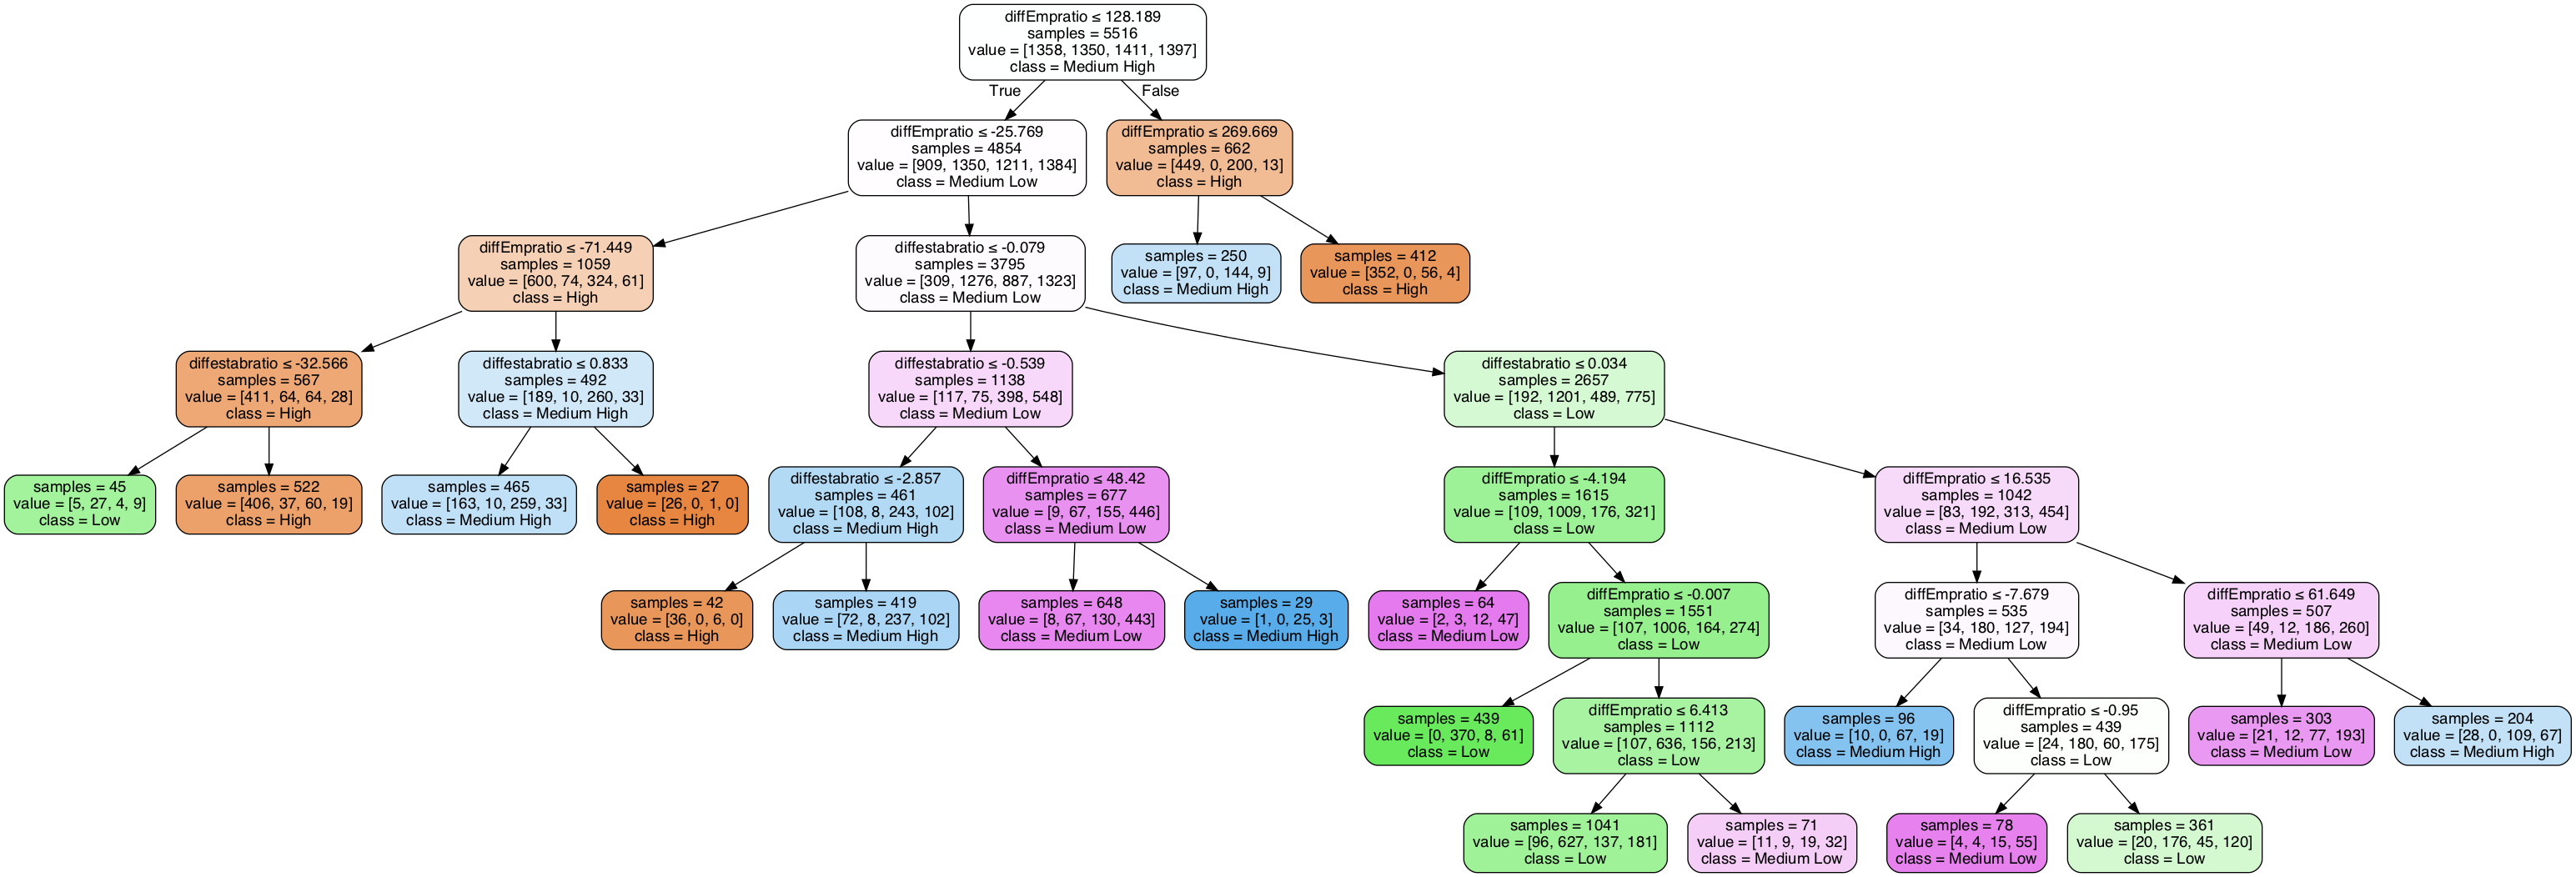

In [37]:
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [38]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
8        diffEmpratio   0.643485
9      diffestabratio   0.356515
10  college_ratio_pop          0
16       walked_ratio          0
15         bicy_ratio          0

## Establishment label

In [42]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"gini"]
y_est = data.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est = train_test_split(X, y_est, test_size=0.3,random_state=2020)

In [43]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,30)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

{'max_depth': 9, 'max_leaf_nodes': 25}
0.6514382402707276


In [44]:
from sklearn import tree

# Use max_depth = 9 and max_leaf_nodes = 25 in this case
dt = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 25)
dt.fit(X_train, y_train_est)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print (thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="diffestabratio <= -1.465, samples = 5516, value = [1358, 1356, 1398, 1404], class = Medium Low", fillcolor="#ffffff"] ;
1 [label="diffestabratio <= -2.943, samples = 852, value = [546, 67, 206, 33], class = High", fillcolor="#f1bd97"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
19 [label="diffestabratio <= -35.147, samples = 518, value = [382, 64, 44, 28], class = High", fillcolor="#eda774"] ;
1 -> 19 ;
23 [label="samples = 42, value = [4, 25, 4, 9], class = Low", fillcolor="#a6f29f"] ;
19 -> 23 ;
24 [label="samples = 476, value = [378, 39, 40, 19], class = High", fillcolor="#eb9d66"] ;
19 -> 24 ;
20 [label="diffEmpratio <= -64.066, samples = 334, value = [164, 3, 162, 5], class = High", fillcolor="#fffefd"] ;
1 -> 20 ;
31 [label="samples = 93, value = [75, 0, 18, 0], class = High", fillcolor="#eb9f69"] ;
20 -> 31 ;
32 [label="samples =

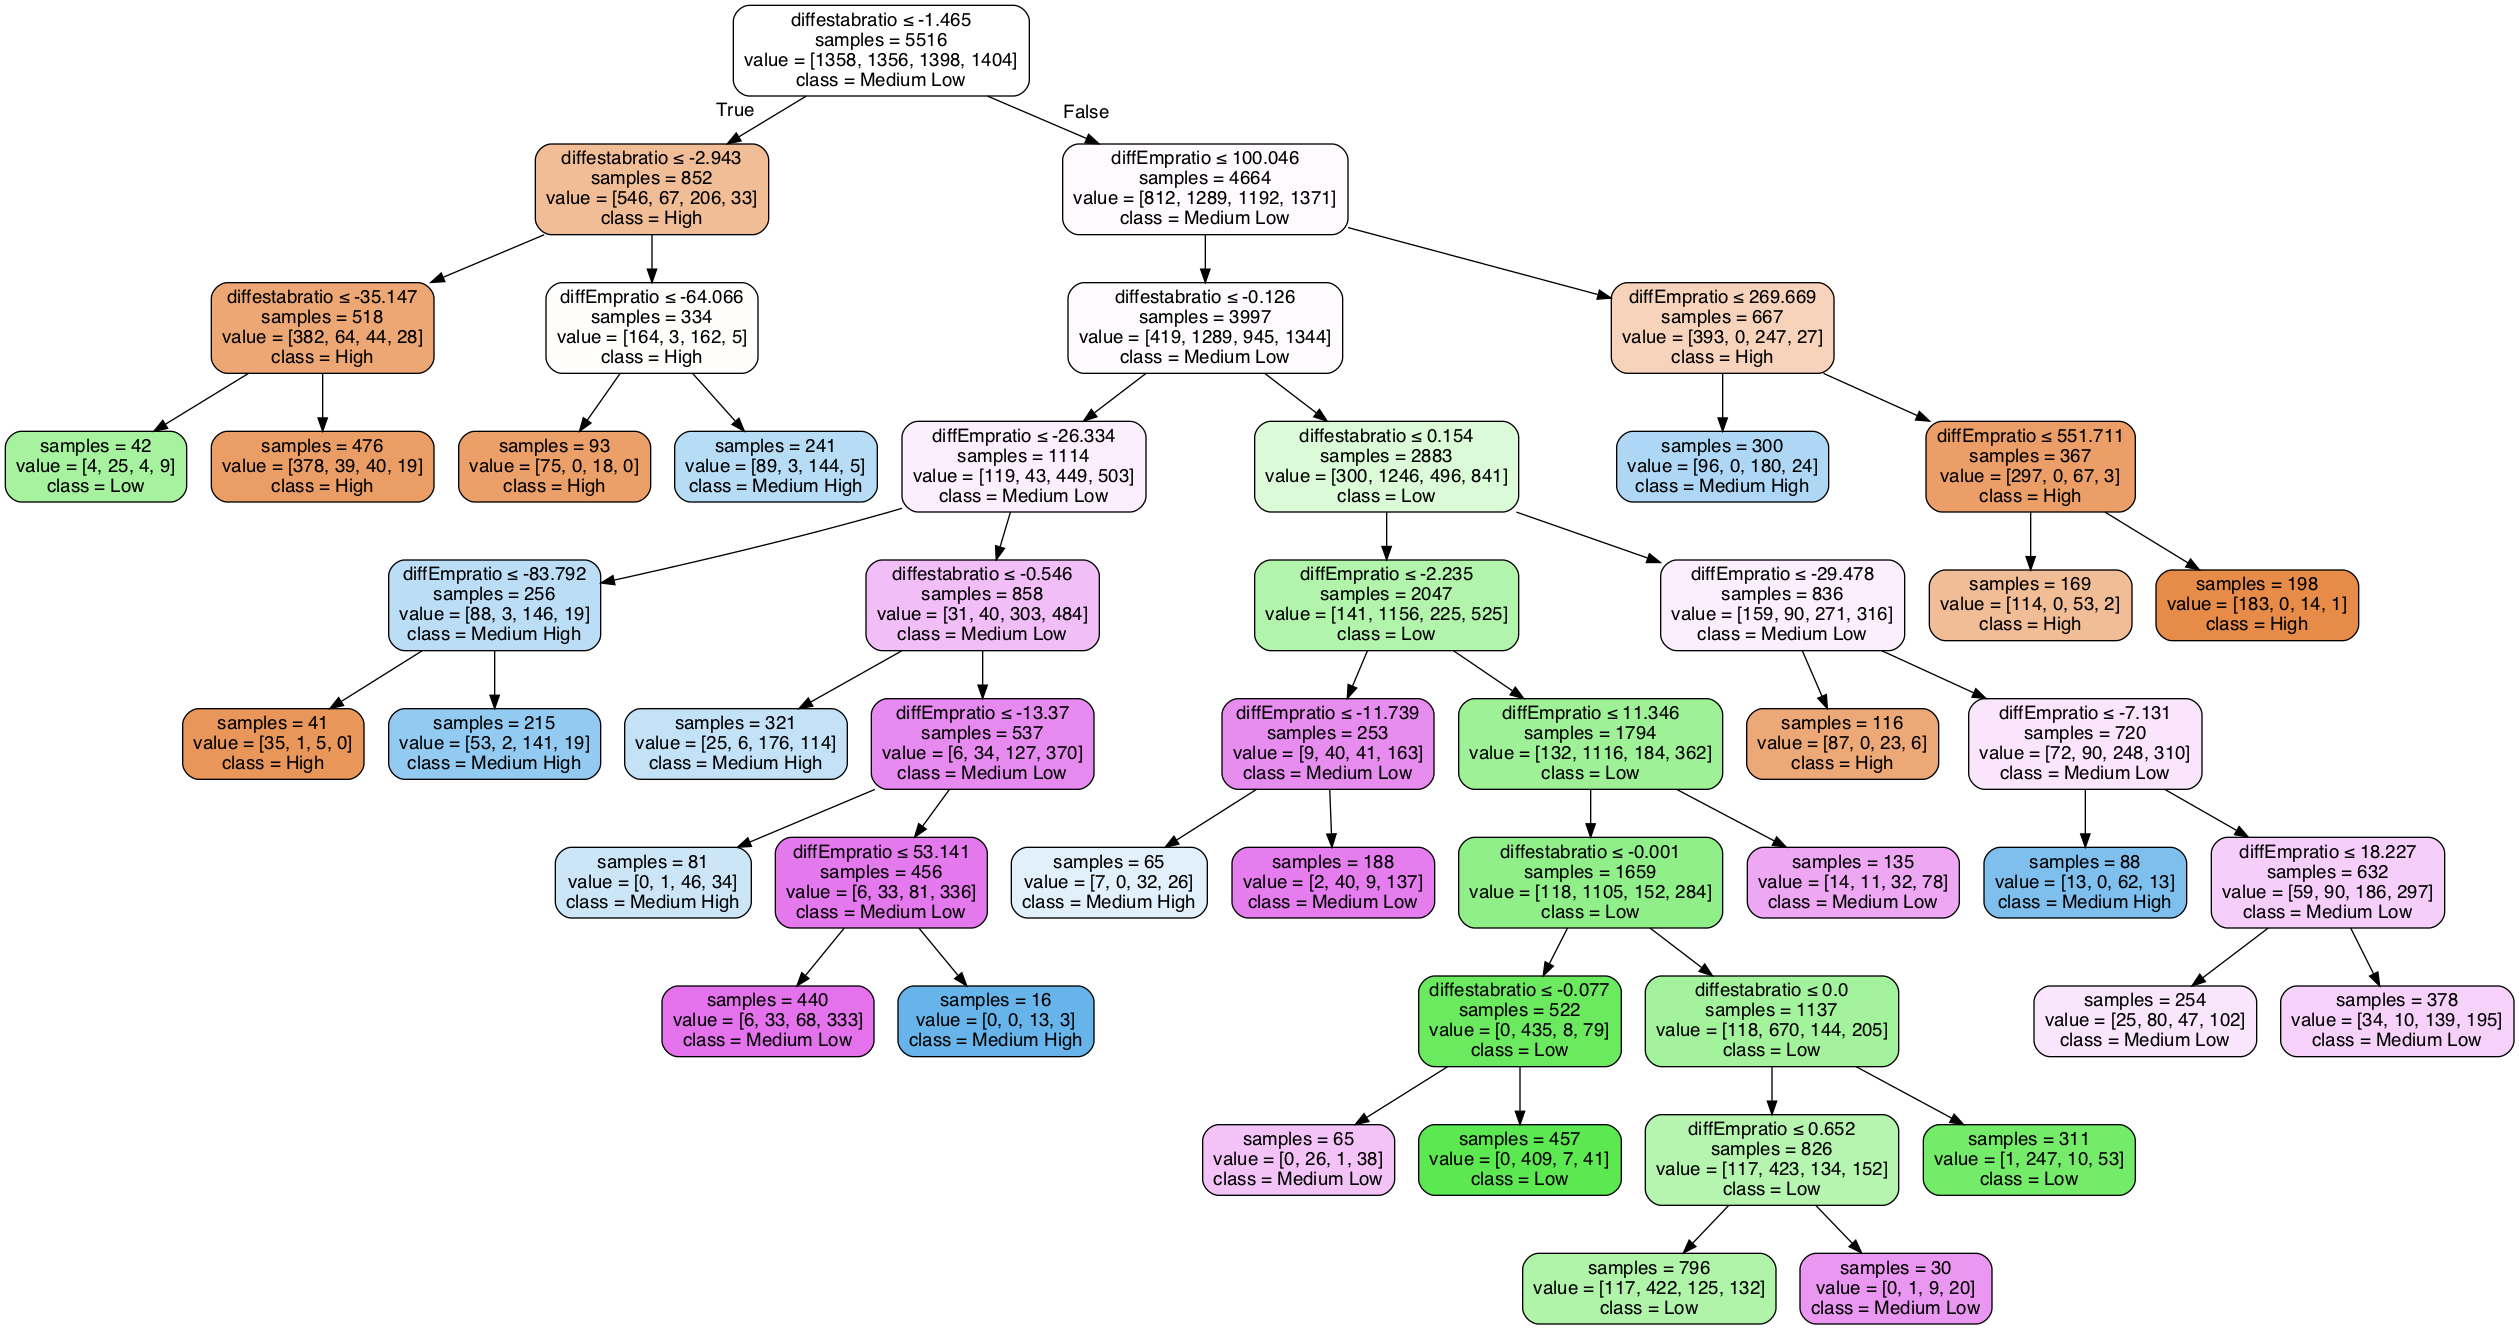

In [45]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [46]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
9      diffestabratio   0.504557
8        diffEmpratio   0.495443
10  college_ratio_pop          0
16       walked_ratio          0
15         bicy_ratio          0

## Separate by years

### Employment size

In [20]:
data_2017 = data[data["year"] == 2017]
data_2017.head(20)

zipcode      geo_id  year     pop  households  income    edut  \
7      91901  6073015502  2017  2902.0       186.0   957.0  2072.0   
15     91901  6073021202  2017  3570.0       174.0  1152.0  2133.0   
23     91901  6073021204  2017  5660.0       167.0  1860.0  4106.0   
31     91901  6073021205  2017  7073.0       117.0  2659.0  4468.0   
39     91901  6073021206  2017  3065.0       100.0  1151.0  2253.0   
47     91901  6073021302  2017  7738.0       121.0  1376.0  5485.0   
55     91902  6073003204  2017  3620.0        94.0   972.0  2551.0   
63     91902  6073003207  2017  6568.0       108.0  2110.0  4400.0   
71     91902  6073013410  2017  8449.0       117.0  2353.0  5679.0   
79     91902  6073013411  2017  5200.0       170.0  1630.0  3912.0   
87     91902  6073013412  2017  4825.0       145.0  1587.0  3552.0   
95     91902  6073013416  2017  4029.0       109.0  1221.0  2664.0   
103    91902  6073013417  2017  2206.0        90.0   637.0  1641.0   
111    91906  6073021100  2017  7434.0       211.0  2475.0  5126.0   
119    91910  6073003204  2017  3620.0        94.0   972.0  2551.0   
127    91910  6073012302  2017  1679.0       113.0   693.0  1099.0   
135    91910  6073012303  2017  3812.0       117.0  1388.0  2914.0   
143    91910  6073012304  2017  3525.0       124.0  1372.0  2385.0   
151    91910  6073012401  2017  3898.0       121.0  1331.0  2474.0   
159    91910  6073012402  2017  5318.0       147.0  1847.0  3374.0   

     total_college  college_ratio  ratio_65  ...  bus_ratio_total  \
7            297.0       0.143340  0.310820  ...         0.000000   
15           338.0       0.158462  0.278431  ...         0.000000   
23           663.0       0.161471  0.303004  ...         0.000000   
31           812.0       0.181737  0.358405  ...         0.009589   
39           478.0       0.212162  0.301468  ...         0.015467   
47           617.0       0.112489  0.455027  ...         0.025817   
55           461.0       0.180713  0.412707  ...         0.038438   
63           736.0       0.167273  0.435597  ...         0.026350   
71          1378.0       0.242648  0.395550  ...         0.029115   
79           957.0       0.244632  0.316154  ...         0.006074   
87           787.0       0.221565  0.316477  ...         0.005472   
95           546.0       0.204955  0.373790  ...         0.000527   
103          391.0       0.238269  0.340435  ...         0.020020   
111          798.0       0.155677  0.296610  ...         0.011500   
119          461.0       0.180713  0.412707  ...         0.038438   
127          135.0       0.122839  0.396665  ...         0.035874   
135          324.0       0.111187  0.330010  ...         0.070693   
143          475.0       0.199161  0.381560  ...         0.027406   
151          322.0       0.130154  0.398666  ...         0.055927   
159          348.0       0.103142  0.374389  ...         0.096062   

     public_ratio  car_ratio  bicy_ratio  walked_ratio    gini     Empratio  \
7        0.000000   0.891831    0.000000      0.003026  0.4395    21.839530   
15       0.000000   0.925830    0.000000      0.032531  0.4099  1048.297456   
23       0.017362   0.891023    0.000000      0.008496  0.3744   131.037182   
31       0.009589   0.848067    0.000000      0.008391  0.4071  2285.870841   
39       0.015467   0.907868    0.000000      0.000000  0.4050   218.395303   
47       0.025817   0.898841    0.000000      0.025290  0.4413    14.559687   
55       0.038438   0.900901    0.000000      0.003604  0.3503   124.735202   
63       0.026350   0.928021    0.000000      0.000000  0.3805   748.411215   
71       0.029115   0.912421    0.016201      0.000000  0.3602   510.280374   
79       0.009544   0.896312    0.000000      0.000000  0.4060   362.866044   
87       0.005472   0.907433    0.000000      0.004560  0.4595  1882.367601   
95       0.000527   0.903005    0.003690      0.033737  0.3596     0.000000   
103      0.027027   0.913914    0.005005      0.000000  0

In [21]:
data_2017 = data_2017.dropna()
# First, create our X and y
X_2017 = data_2017.loc[ : , "pop":"gini"]
y_emp_2017 = data_2017.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2017, y_emp_2017, test_size=0.3,random_state=2020)

In [91]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,21)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 7, 'max_leaf_nodes': 14}
0.3885135135135135


In [92]:
# Use max_depth = 7 and max_leaf_nodes = 14 in this case
dt = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 14)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print (thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="diffestabratio <= -0.147, samples = 690, value = [139, 185, 175, 191], class = Medium Low", fillcolor="#fffdff"] ;
1 [label="bus_ratio <= 0.948, samples = 123, value = [2, 83, 9, 29], class = Low", fillcolor="#95f08d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
15 [label="samples = 63, value = [1, 52, 2, 8], class = Low", fillcolor="#6cea61"] ;
1 -> 15 ;
16 [label="walked_ratio <= 0.017, samples = 60, value = [1, 31, 7, 21], class = Low", fillcolor="#d0f8cc"] ;
1 -> 16 ;
17 [label="samples = 31, value = [0, 23, 1, 7], class = Low", fillcolor="#84ee7b"] ;
16 -> 17 ;
18 [label="samples = 29, value = [1, 8, 6, 14], class = Medium Low", fillcolor="#f4c6f8"] ;
16 -> 18 ;
2 [label="diffEmpratio <= 1059.141, samples = 567, value = [137, 102, 166, 162], class = Medium High", fillcolor="#fdfeff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, hea

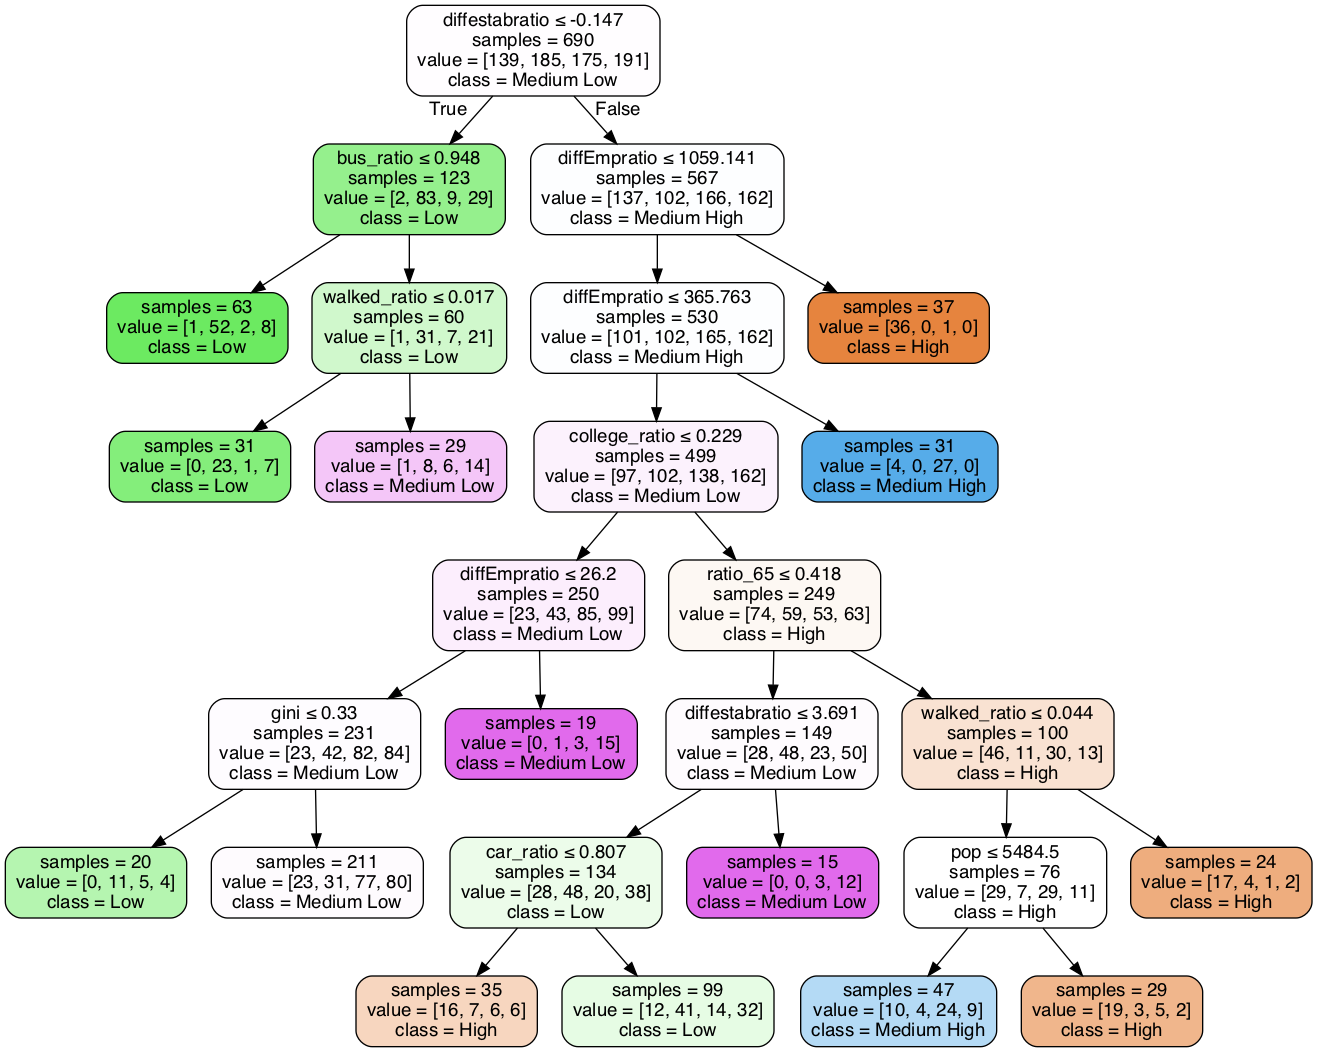

In [93]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [94]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
8     diffEmpratio    0.34459
9   diffestabratio   0.296921
6         ratio_65  0.0791512
5    college_ratio  0.0749832
16    walked_ratio  0.0648223

### Remove diffEmpratio and diffestabratio

In [34]:
data_2017_2 = data_2017.drop(columns = ["diffEmpratio", "diffestabratio"], axis = 1)
# First, create our X and y
X_2017_2 = data_2017_2.loc[ : , "pop":"gini"]
y_emp_2017_2 = data_2017_2.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2017_2, y_emp_2017_2, test_size=0.3,random_state=2020)

In [98]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,21)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 5, 'max_leaf_nodes': 19}
0.30743243243243246


In [99]:
dt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 19)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print (thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="college_ratio_pop <= 0.253, samples = 690, value = [139, 185, 175, 191], class = Medium Low", fillcolor="#fffdff"] ;
1 [label="bus_ratio <= 0.795, samples = 572, value = [94, 145, 157, 176], class = Medium Low", fillcolor="#fdf6fe"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="ratio_65 <= 0.419, samples = 226, value = [36, 83, 53, 54], class = Low", fillcolor="#e0fbde"] ;
1 -> 3 ;
7 [label="households <= 193.5, samples = 165, value = [16, 61, 38, 50], class = Low", fillcolor="#edfdec"] ;
3 -> 7 ;
21 [label="ratio_22_50 <= 0.086, samples = 149, value = [15, 49, 38, 47], class = Low", fillcolor="#fbfefb"] ;
7 -> 21 ;
27 [label="samples = 12, value = [6, 2, 1, 3], class = High", fillcolor="#f6d5bd"] ;
21 -> 27 ;
28 [label="samples = 137, value = [9, 47, 37, 44], class = Low", fillcolor="#f9fef9"] ;
21 -> 28 ;
22 [label="samples = 

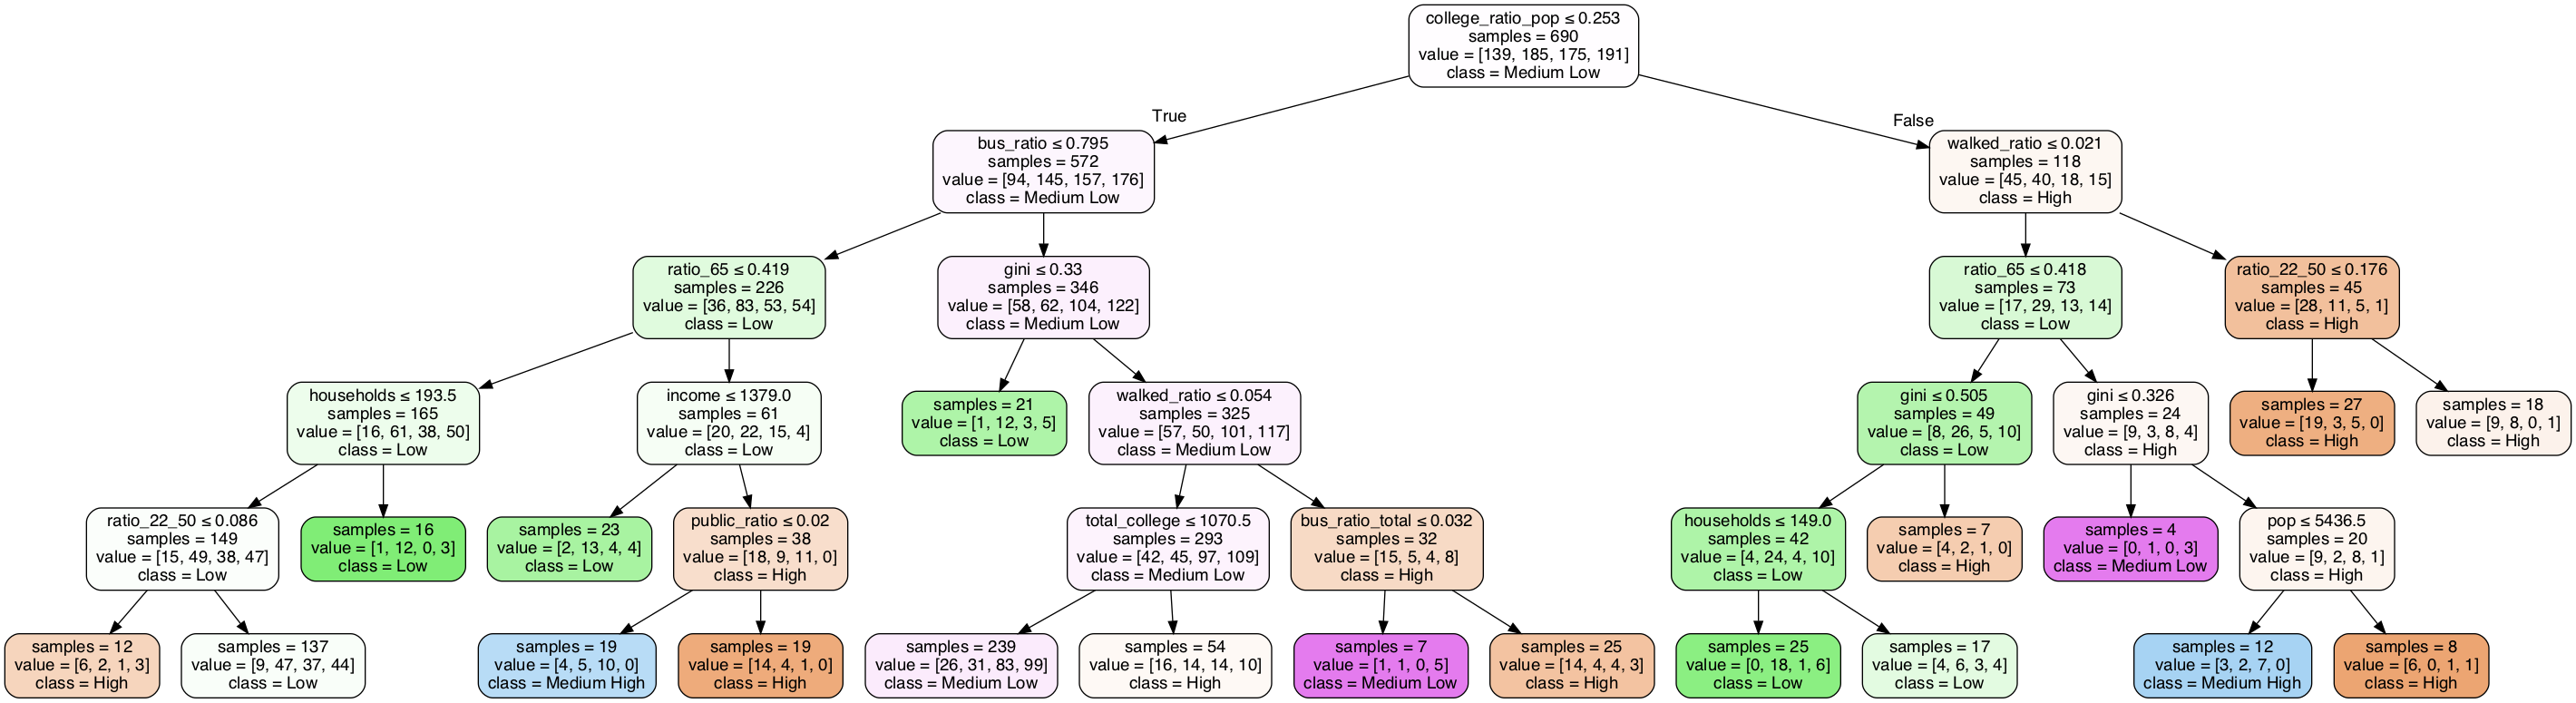

In [100]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [101]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.136712
8   college_ratio_pop   0.129699
15               gini   0.126649
6            ratio_65    0.11917
9           bus_ratio  0.0937989

### Another year

In [102]:
data_2016 = data[data["year"] == 2016]
data_2016.head()

zipcode      geo_id  year     pop  households  income    edut  \
6     91901  6073015502  2016  2849.0       189.0   950.0  2017.0   
14    91901  6073021202  2016  3234.0       175.0  1089.0  2086.0   
22    91901  6073021204  2016  5820.0       166.0  1880.0  4224.0   
30    91901  6073021205  2016  7537.0       124.0  2752.0  4741.0   
38    91901  6073021206  2016  2806.0       102.0  1123.0  2105.0   

    total_college  college_ratio  ratio_65  ...  bus_ratio_total  \
6           259.0       0.128409  0.316602  ...         0.000000   
14          295.0       0.141419  0.265925  ...         0.000000   
22          659.0       0.156013  0.271478  ...         0.000000   
30          759.0       0.160093  0.335412  ...         0.010756   
38          462.0       0.219477  0.300071  ...         0.007326   

    public_ratio  car_ratio  bicy_ratio  walked_ratio    gini     Empratio  \
6       0.000000   0.894065         0.0      0.005259  0.4479    36.399217   
14      0.000000   0.912268         0.0      0.031227  0.4174  1747.162427   
22      0.017280   0.880165         0.0      0.010143  0.3377   218.395303   
30      0.010756   0.853558         0.0      0.009928  0.4229  3809.784736   
38      0.007326   0.926007         0.0      0.000000  0.4176   363.992172   

    estabratio    emp_label   est_label  
6     1.843444          Low         Low  
14   88.485323         High        High  
22   11.060665   Medium Low  Medium Low  
30  192.947162         High        High  
38   18.434442  Medium High  Medium Low  

[5 rows x 25 columns]

In [105]:
data_2016 = data_2016.dropna()
# First, create our X and y
X_2016 = data_2016.loc[ : , "pop":"gini"]
y_emp_2016 = data_2016.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2016, y_emp_2016, test_size=0.3,random_state=2020)

#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,30)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 6, 'max_leaf_nodes': 9}
0.8378378378378378


In [106]:
dt = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 9)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

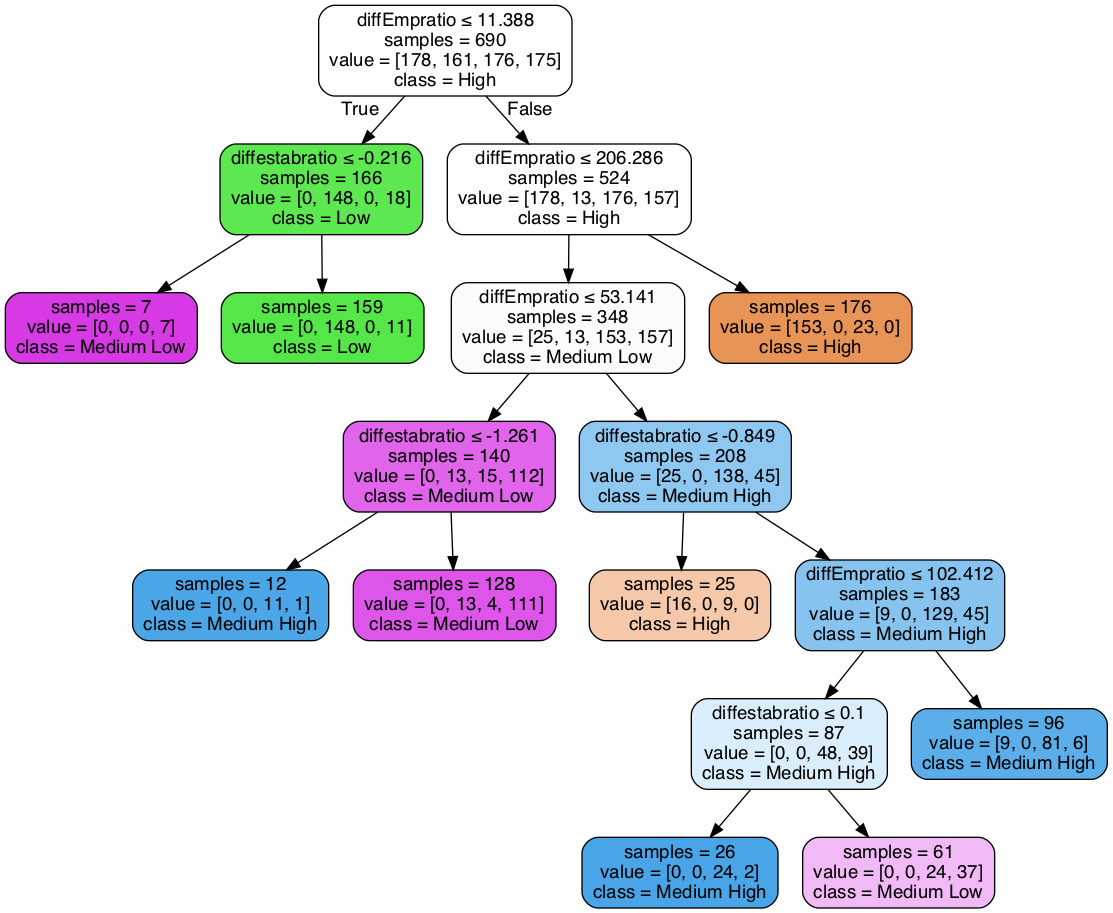

In [107]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

In [108]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
8        diffEmpratio   0.861743
9      diffestabratio   0.138257
10  college_ratio_pop          0
16       walked_ratio          0
15         bicy_ratio          0

### Remove diffEmpratio and diffestabratio for year 2016

In [109]:
data_2016_2 = data_2016.drop(columns = ["diffEmpratio", "diffestabratio"], axis = 1)
# First, create our X and y
X_2016_2 = data_2016_2.loc[ : , "pop":"gini"]
y_emp_2016_2 = data_2016_2.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2017_2, y_emp_2017_2, test_size=0.3,random_state=2020)

In [110]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,30)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 5, 'max_leaf_nodes': 19}
0.30743243243243246


In [111]:
dt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 19)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

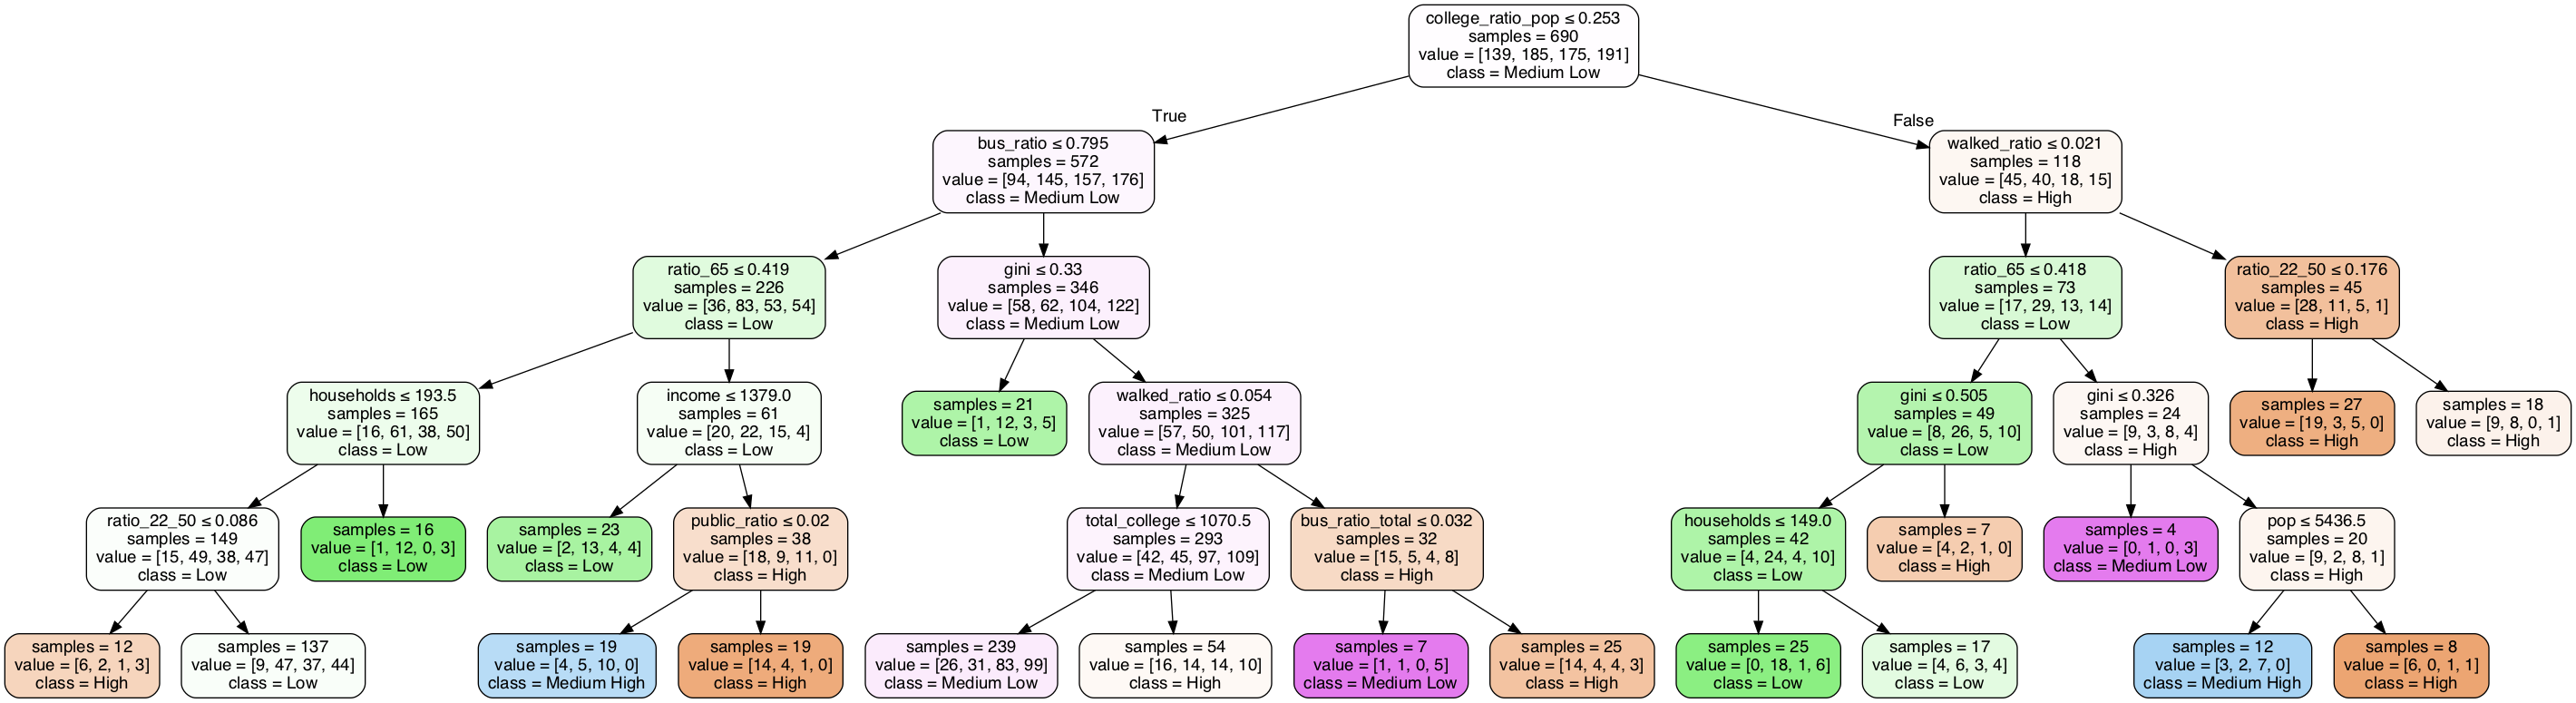

In [112]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

In [113]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.136712
8   college_ratio_pop   0.129699
15               gini   0.126649
6            ratio_65    0.11917
9           bus_ratio  0.0937989

### Establishment size in 2016 and 2017 without diffEmpratio and diffestabratio

### 2017

In [114]:
# First, create our X and y
X_2017_2 = data_2017_2.loc[ : , "pop":"gini"]
y_est_2017_2 = data_2017_2.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est=train_test_split(X_2017_2, y_est_2017_2, test_size=0.3,random_state=2020)

In [115]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,30)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

{'max_depth': 7, 'max_leaf_nodes': 19}
0.27364864864864863


In [116]:
# Use max_depth = 7 and max_leaf_nodes = 19 in this case
dt = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 19)
dt.fit(X_train, y_train_est)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

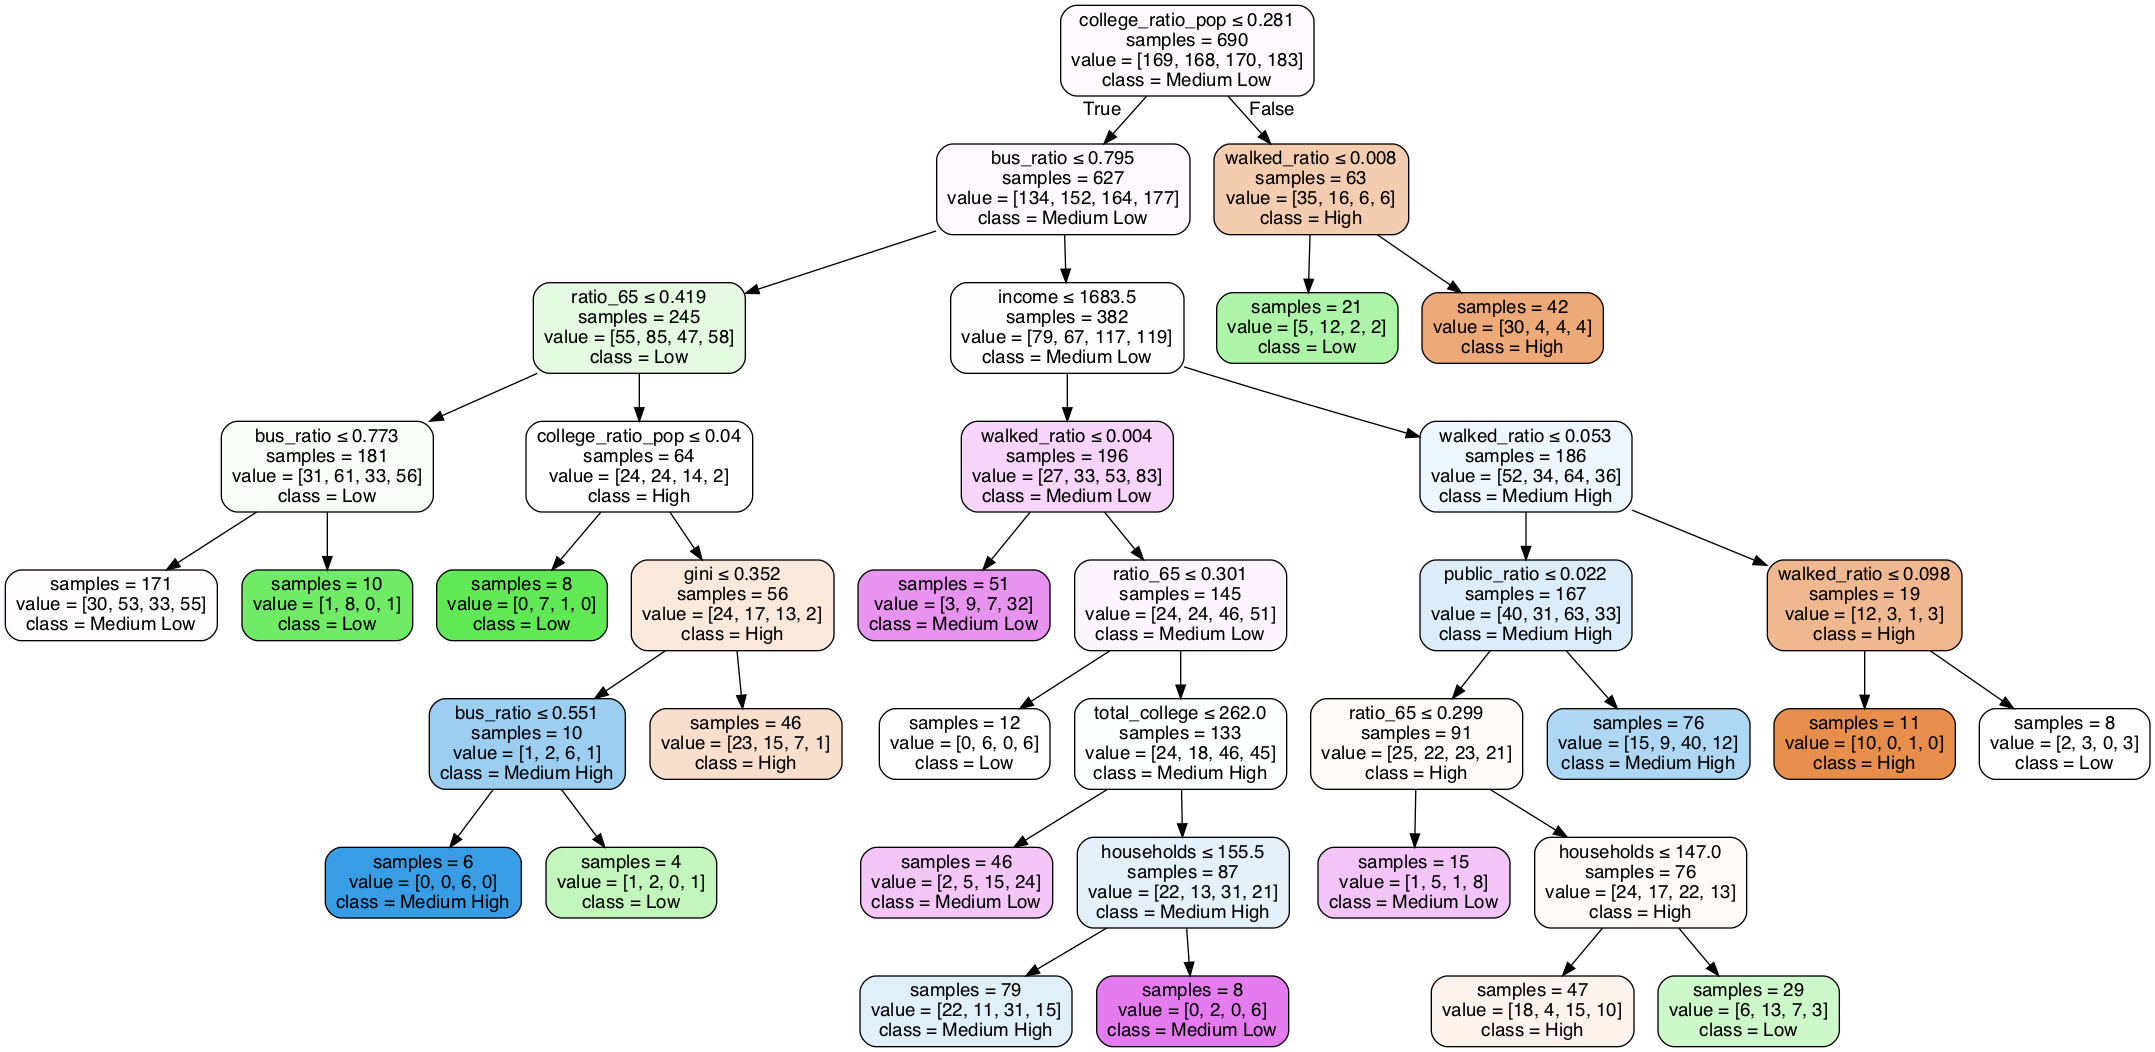

In [117]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

In [118]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.220961
8   college_ratio_pop   0.164893
9           bus_ratio   0.161616
6            ratio_65   0.146293
2              income  0.0887116

### 2016

In [121]:
# First, create our X and y
X_2016_2 = data_2016_2.loc[ : , "pop":"gini"]
y_est_2016_2 = data_2016_2.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est=train_test_split(X_2016_2, y_est_2016_2, test_size=0.3,random_state=2020)

In [122]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,30)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

{'max_depth': 6, 'max_leaf_nodes': 26}
0.3310810810810811


In [123]:
# Use max_depth = 6 and max_leaf_nodes = 26 in this case
dt = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 26)
dt.fit(X_train, y_train_est)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

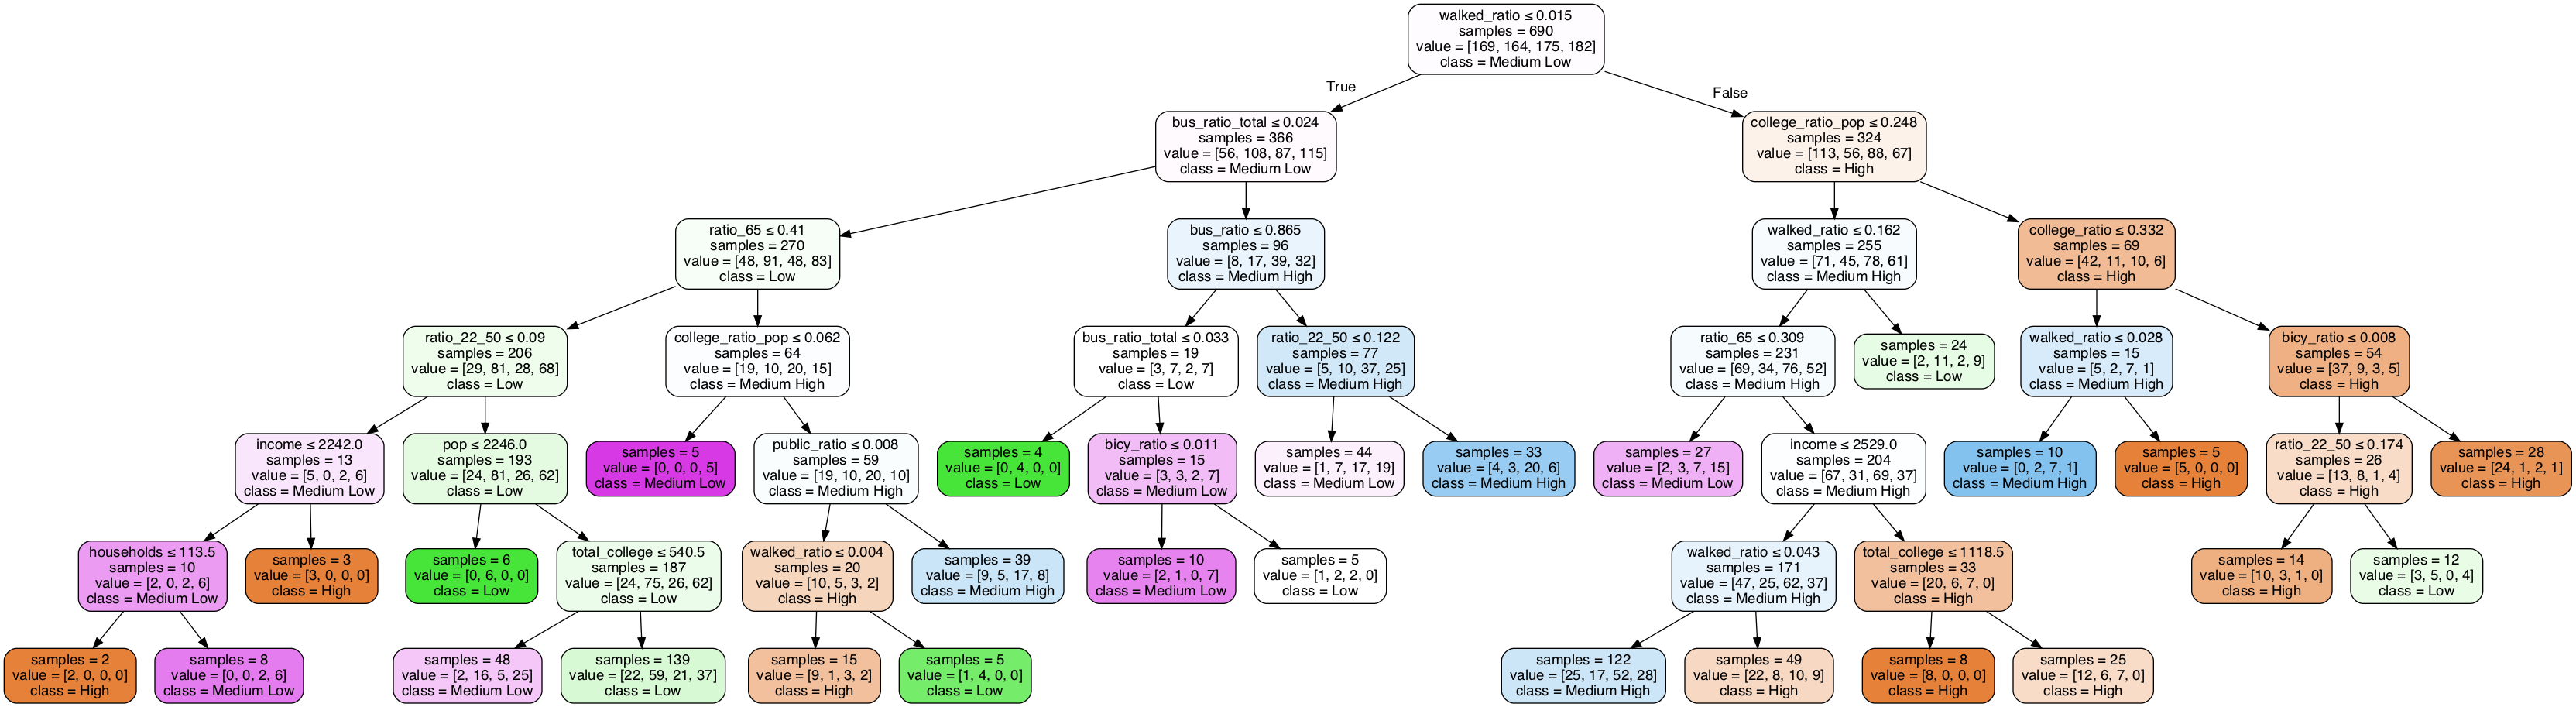

In [124]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

In [125]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.275562
8   college_ratio_pop   0.126669
6            ratio_65   0.107524
10    bus_ratio_total  0.0889833
7         ratio_22_50   0.078232

# Random Forest

Random forest can estimate feature importance and avoid overfitting. We want to see the accurary of prediction and importance of top variables.<br>
We test employment label and establishment label as output.

## Employment label

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random forest model
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=19)
rf.fit(X_train, y_train_emp)
print (rf.score(X_test, y_test_emp))

0.621404399323181


In [49]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
8     diffEmpratio   0.394132
9   diffestabratio   0.340472
6         ratio_65  0.0562561
2           income  0.0390893
16    walked_ratio  0.0234639

### In year 2017 and without diff

In [130]:
# Random forest model
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2017_2, y_emp_2017_2, test_size=0.3,random_state=2020)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=19)
rf.fit(X_train, y_train_emp)
print (rf.score(X_test, y_test_emp))

0.32094594594594594


In [131]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.118392
6            ratio_65    0.10022
8   college_ratio_pop  0.0875513
15               gini  0.0791057
4       total_college  0.0734258

### In year 2016 and without diff

In [132]:
# Random forest model
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2016_2, y_emp_2016_2, test_size=0.3,random_state=2020)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=19)
rf.fit(X_train, y_train_emp)
print (rf.score(X_test, y_test_emp))

0.3310810810810811


In [133]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.120437
6            ratio_65   0.114625
8   college_ratio_pop  0.0796348
5       college_ratio   0.075363
12          car_ratio  0.0663042

## Establishment label

In [53]:
rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_leaf_nodes=29)
rf.fit(X_train, y_train_est)
print (rf.score(X_test, y_test_est))

0.6501692047377327


In [54]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
8      diffEmpratio   0.450658
9    diffestabratio   0.338945
6          ratio_65  0.0298633
2            income  0.0262569
12  bus_ratio_total  0.0190907

### In year 2017 and without diff

In [134]:
# Random forest model
X_train, X_test, y_train_est, y_test_est=train_test_split(X_2017_2, y_est_2017_2, test_size=0.3,random_state=2020)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=19)
rf.fit(X_train, y_train_est)
print (rf.score(X_test, y_test_est))

0.32094594594594594


In [135]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
6            ratio_65   0.105134
14       walked_ratio   0.101534
8   college_ratio_pop  0.0839012
5       college_ratio   0.078573
2              income  0.0732417

### In year 2016 and without diff

In [136]:
# Random forest model
X_train, X_test, y_train_est, y_test_est=train_test_split(X_2016_2, y_est_2016_2, test_size=0.3,random_state=2020)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=19)
rf.fit(X_train, y_train_est)
print (rf.score(X_test, y_test_est))

0.34121621621621623


In [137]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
14       walked_ratio   0.119574
6            ratio_65  0.0966105
8   college_ratio_pop  0.0926144
5       college_ratio  0.0769177
2              income  0.0747242

### Try continuous label

In [61]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"gini"]
y_est = data.loc[ : , "estabratio"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est = train_test_split(X, y_est, test_size=0.3,random_state=2020)

In [63]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train_est = lab_enc.fit_transform(y_train_est)
y_test_est = lab_enc.fit_transform(y_test_est)
#print(y_train_est)
print(utils.multiclass.type_of_target(y_train_est))
print(utils.multiclass.type_of_target(y_train_est.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

multiclass
multiclass
multiclass


In [64]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'max_depth': 3}
0.07952622673434856


In [82]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train_est)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
predictions = dt.predict(X_test)
errors = abs(predictions - y_test_est)

In [87]:
predictions

array([  0,   0, 369, ..., 369,   0,   0])

In [84]:
y_test_est

array([ 477, 1994,  654, ..., 1871,  722, 1606])

In [85]:
errors

array([ 477, 1994,  285, ..., 1502,  722, 1606])

In [86]:
mape = 100 * (errors / y_test_est)
accuracy = 100 - np.nanmean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -4.48 %.


/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [66]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

variables importance
9      diffestabratio   0.906457
8        diffEmpratio   0.080709
6            ratio_65  0.0128341
10  college_ratio_pop          0
16       walked_ratio          0

# GWR (Geo Weighted Regression)

In [138]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

/Users/zehui/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [142]:
from shapely import wkt
df["geometry"] = df["geometry"].apply(wkt.loads)
df["centroid"] = df["centroid"].apply(wkt.loads)

In [144]:
dfshp = gp.GeoDataFrame(df, geometry = "geometry")

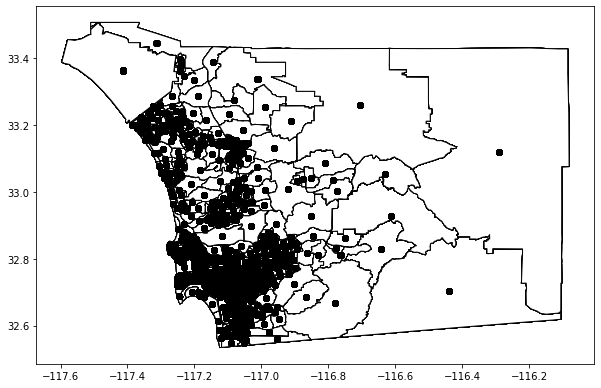

In [145]:
fig, ax = plt.subplots(figsize = (10, 10))
dfshp.plot(ax=ax, **{"edgecolor": "black", "facecolor": "white"})
dfshp.centroid.plot(ax = ax, c = "black")
plt.savefig("sd_shp")
plt.show()

## Establishment size

In [146]:
g_y = dfshp["estabratio"].values.reshape((-1, 1))

In [147]:
g_X =dfshp[["pop", "gini", "income", "edut", "ratio_65", "diffEmpratio", "diffestabratio",
            "bus_ratio", "public_ratio", "walked_ratio"]].values

In [148]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp["centroid"]))]

In [149]:
g_coords = g_coords = list(zip(x, y))

In [150]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [151]:
import warnings
warnings.filterwarnings("ignore")

In [152]:
gwr_bw = gwr_selector.search()

In [153]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [154]:
gwr_results = gwr_model.fit()

In [155]:
print(gwr_results.resid_ss)

47247019.498879634


In [157]:
dfshp["R2"] = gwr_results.localR2

In [158]:
dfshp["R2"] = abs(dfshp["R2"])
dfshp2 = dfshp[dfshp["R2"] <= 1]

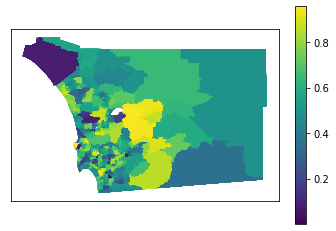

In [159]:
#Local model fit
dfshp2.plot("R2", legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("local_R2")
plt.show()

In [160]:
print(gwr_results.R2)

0.7261651117978545


## Employment size

In [166]:
g_y = dfshp["Empratio"].values.reshape((-1, 1))

In [167]:
g_X =dfshp[["pop", "gini", "income", "edut", "ratio_65", "diffEmpratio", "diffestabratio",
            "bus_ratio", "public_ratio", "walked_ratio"]].values

In [168]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp["centroid"]))]

In [169]:
g_coords = g_coords = list(zip(x, y))

In [170]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [171]:
gwr_bw = gwr_selector.search()

In [172]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

32077981094.37796


In [173]:
dfshp["R2"] = gwr_results.localR2
dfshp["R2"] = abs(dfshp["R2"])
dfshp2 = dfshp[dfshp["R2"] <= 1]

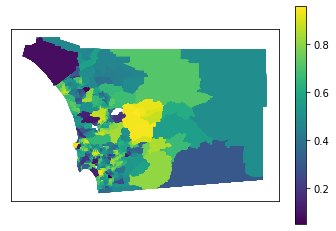

In [174]:
#Local model fit
dfshp2.plot("R2", legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("local_R2")
plt.show()

In [175]:
print(gwr_results.R2)

0.6879356556143019


# SVM

SVM usually have good performance as a supervised learning model for categorical labels.

In [23]:
from sklearn import svm
import matplotlib.pyplot as plt

## Employment size

In [17]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"gini"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

No handles with labels found to put in legend.


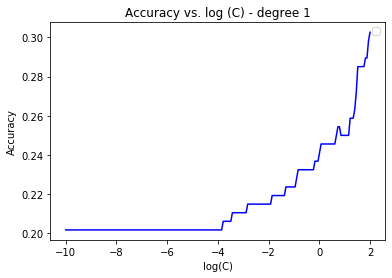

No handles with labels found to put in legend.


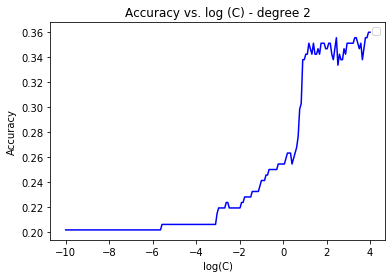

No handles with labels found to put in legend.


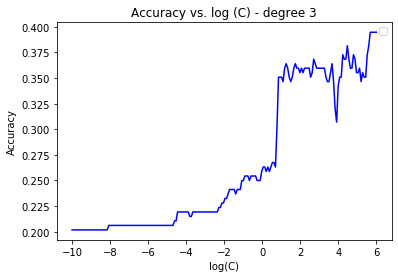

No handles with labels found to put in legend.


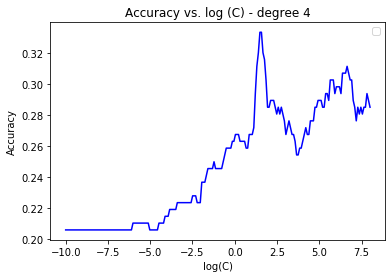

In [24]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train_emp, test_size=0.33, random_state=2020)

# Compute and plot the accuracy vs log(C)
for i in range(1,5):
    C = [np.exp(i) for i in np.linspace(-10,2*i,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree=i, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.title("Accuracy vs. log (C) - degree {}".format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

In [25]:
# Let's use polynomial SVM with degree 3

clf_2 = svm.SVC(kernel = "poly", degree = 3) 
clf_2.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_2.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_2.predict(X_test)).sum()*100/len(y_test_emp)))

In sample, we successfully predict 35.507246376811594 percent of the data
Out of sample, we successfully predict 27.7027027027027 percent of the data


In [28]:
clf_l = svm.SVC(kernel = "linear", C = 20) 
clf_l.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_l.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_l.predict(X_test)).sum()*100/len(y_test_emp)))

In sample, we successfully predict 41.88405797101449 percent of the data
Out of sample, we successfully predict 36.486486486486484 percent of the data


## Employment size of year 2017

In [30]:
data_2017 = data_2017.dropna()
# First, create our X and y
X = data_2017.loc[ : , "pop":"gini"]
y_emp = data_2017.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

No handles with labels found to put in legend.


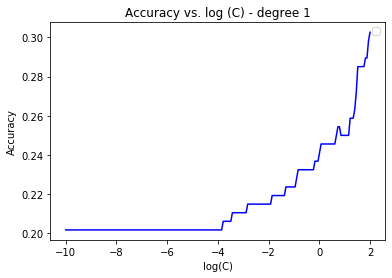

No handles with labels found to put in legend.


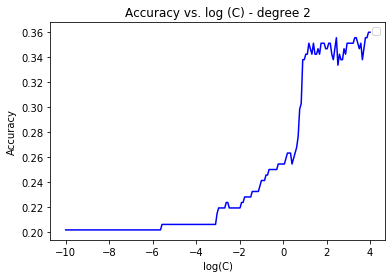

No handles with labels found to put in legend.


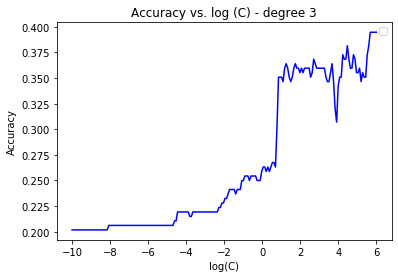

No handles with labels found to put in legend.


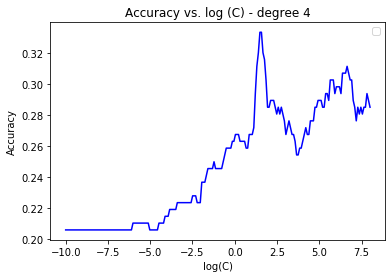

In [31]:
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train_emp, test_size=0.33, random_state=2020)

# Compute and plot the accuracy vs log(C)
for i in range(1,5):
    C = [np.exp(i) for i in np.linspace(-10,2*i,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree=i, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.title("Accuracy vs. log (C) - degree {}".format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

In [32]:
# Let's use polynomial SVM with degree 3

clf_2 = svm.SVC(kernel = "poly", degree = 3) 
clf_2.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_2.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_2.predict(X_test)).sum()*100/len(y_test_emp)))

In sample, we successfully predict 35.507246376811594 percent of the data
Out of sample, we successfully predict 27.7027027027027 percent of the data


In [33]:
clf_l = svm.SVC(kernel = "linear", C = 20) 
clf_l.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_l.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_l.predict(X_test)).sum()*100/len(y_test_emp)))

In sample, we successfully predict 41.88405797101449 percent of the data
Out of sample, we successfully predict 36.486486486486484 percent of the data


## Year 2017 without diff

In [35]:
data_2017_2 = data_2017.drop(columns = ["diffEmpratio", "diffestabratio"], axis = 1)
# First, create our X and y
X_2017_2 = data_2017_2.loc[ : , "pop":"gini"]
y_emp_2017_2 = data_2017_2.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X_2017_2, y_emp_2017_2, test_size=0.3,random_state=2020)

No handles with labels found to put in legend.


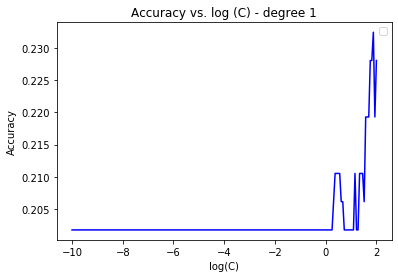

No handles with labels found to put in legend.


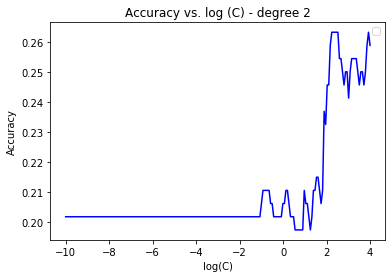

No handles with labels found to put in legend.


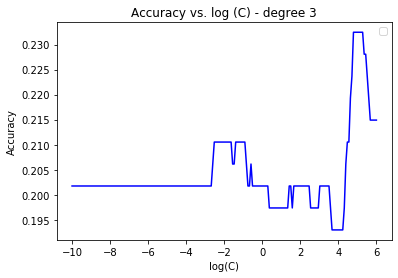

No handles with labels found to put in legend.


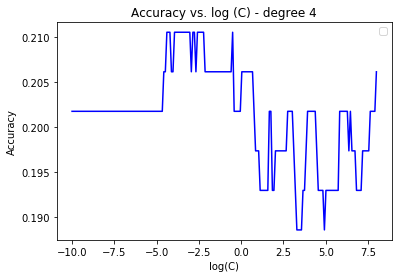

In [36]:
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train_emp, test_size=0.33, random_state=2020)

# Compute and plot the accuracy vs log(C)
for i in range(1,5):
    C = [np.exp(i) for i in np.linspace(-10,2*i,200)] 
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',degree=i, C=c) 
        clf.fit(X_train_1, Y_train_1)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali) # OS score for validation set
        OS_validation.append(correct)
    

    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    plt.legend(loc='upper right')
    plt.title("Accuracy vs. log (C) - degree {}".format(i))
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()

In [37]:
clf_l = svm.SVC(kernel = "linear", C = 20) 
clf_l.fit(X_train, y_train_emp)
print ("In sample, we successfully predict {} percent of the data".format((y_train_emp == clf_l.predict(X_train)).sum()*100/len(y_train_emp)))
print ("Out of sample, we successfully predict {} percent of the data".format((y_test_emp == clf_l.predict(X_test)).sum()*100/len(y_test_emp)))

In sample, we successfully predict 32.608695652173914 percent of the data
Out of sample, we successfully predict 28.04054054054054 percent of the data
